### Pearson Correlation Coefficient

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
human_gr = pd.read_csv('/content/drive/MyDrive/Jyothi Mam/correlation/new/scaled_output_final.csv')

ai_gr = pd.read_csv('/content/drive/MyDrive/Jyothi Mam/correlation/new/human rating for pretrained models.csv')

dfh = human_gr

dfa = ai_gr

In [4]:
dfh.shape

(88, 11)

In [5]:
dfa.shape

(88, 11)

In [6]:
dfa.isnull().sum()

,0
Participant,0
Fluency,0
Clarity,0
Relevance,0
Correctness,0
Professionalism,0
Structured Answers,0
No Fillers,0
Focused,0
Authentic,0


In [7]:
dfh.isnull().sum()

,0
Participant,0
Fluency,0
Clarity,0
Relevance,0
Correctness,0
Professionalism,0
Structured Answers,0
No Fillers,0
Focused,0
Authentic,0


In [8]:
dfh.dropna(inplace=True)

In [9]:
dfa.dropna(inplace=True)

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

In [11]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Participant         88 non-null     int64
 1   Fluency             88 non-null     int64
 2   Clarity             88 non-null     int64
 3   Relevance           88 non-null     int64
 4   Correctness         88 non-null     int64
 5   Professionalism     88 non-null     int64
 6   Structured Answers  88 non-null     int64
 7   No Fillers          88 non-null     int64
 8   Focused             88 non-null     int64
 9   Authentic           88 non-null     int64
 10  Overall             88 non-null     int64
dtypes: int64(11)
memory usage: 7.7 KB


In [12]:
dfh.head()

,Participant,Fluency,Clarity,Relevance,Correctness,Professionalism,Structured Answers,No Fillers,Focused,Authentic,Overall
0,1,6,5,4,4,5,5,6,7,6,6
1,2,6,5,5,3,4,4,4,4,5,5
2,3,6,4,5,6,5,4,5,5,5,6
3,4,6,7,6,5,6,5,6,7,7,7
4,8,7,7,6,5,7,6,8,7,6,7


In [13]:
dfh.describe()

,Participant,Fluency,Clarity,Relevance,Correctness,Professionalism,Structured Answers,No Fillers,Focused,Authentic,Overall
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,142.625000,5.727273,5.454545,5.306818,4.522727,5.443182,4.943182,4.931818,5.477273,5.397727,5.227273
std,89.355587,1.428183,1.429646,1.496033,1.405877,1.589173,1.607153,1.552125,1.735215,1.643796,1.436209
min,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,43.250000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,150.500000,6.000000,6.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,213.500000,7.000000,7.000000,7.000000,6.000000,6.250000,6.000000,6.000000,7.000000,7.000000,6.000000
max,285.000000,9.000000,8.000000,8.000000,8.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


In [14]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Participant         88 non-null     int64
 1   Fluency             88 non-null     int64
 2   Clarity             88 non-null     int64
 3   Relevance           88 non-null     int64
 4   Correctness         88 non-null     int64
 5   Professionalism     88 non-null     int64
 6   Structured Answers  88 non-null     int64
 7   No Fillers          88 non-null     int64
 8   Focused             88 non-null     int64
 9   Authentic           88 non-null     int64
 10  Overall             88 non-null     int64
dtypes: int64(11)
memory usage: 7.7 KB


In [15]:
dfa.head()

,Participant,Fluency,Clarity,Relevance,Correctness,Professionalism,Structured Answers,No Fillers,Focused,Authentic,Overall
0,1,6,5,5,4,5,7,6,8,6,6
1,2,6,5,5,4,5,5,6,4,5,5
2,3,6,5,5,6,5,6,5,6,6,6
3,4,7,8,7,6,7,8,8,7,7,6
4,8,7,7,7,6,7,7,8,8,7,7


In [16]:
dfa.describe()

,Participant,Fluency,Clarity,Relevance,Correctness,Professionalism,Structured Answers,No Fillers,Focused,Authentic,Overall
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,142.625000,5.806818,5.681818,5.613636,4.863636,5.772727,5.488636,5.772727,5.613636,5.715909,5.568182
std,89.355587,1.413059,1.615624,1.564196,1.547574,1.638104,1.741939,1.861450,1.751399,1.646654,1.666405
min,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000
25%,43.250000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000
50%,150.500000,6.000000,6.000000,6.000000,5.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,213.500000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
max,285.000000,9.000000,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Assuming dfh and dfa are your DataFrames containing human and AI marks respectively

# List of parameters
parameters = ['Relevance', 'Clarity', 'Correctness', 'Structured Answers', 'Fluency', 'Professionalism', 'No Fillers', 'Focused', 'Authentic', 'Overall']

# Initialize lists to store MSE and RMSE for each parameter
mse_list = []
rmse_list = []
p_values = []

# Iterate over each parameter
for parameter in parameters:
    # Extract human and AI marks for the parameter
    human_marks = dfh[parameter]
    ai_marks = dfa[parameter]

    # Handle missing values if any
    imputer = SimpleImputer(strategy='mean')  # Impute missing values with mean
    human_marks = imputer.fit_transform(human_marks.values.reshape(-1, 1)).flatten()
    ai_marks = imputer.transform(ai_marks.values.reshape(-1, 1)).flatten()

    # Normalize data
    scaler = StandardScaler()
    human_marks_scaled = scaler.fit_transform(human_marks.reshape(-1, 1)).flatten()
    ai_marks_scaled = scaler.transform(ai_marks.reshape(-1, 1)).flatten()

    # Calculate MSE
    mse = mean_squared_error(human_marks_scaled, ai_marks_scaled)
    mse_list.append(mse)

    # Calculate RMSE
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    # Calculate p-value for statistical significance
    _, p_value = stats.ttest_rel(human_marks_scaled, ai_marks_scaled)
    p_values.append(p_value)

# Print MSE, RMSE, and p-value for each parameter
# for i, parameter in enumerate(parameters):
#     print(f"{parameter}:")
#     print("  Mean Squared Error (MSE):", mse_list[i])
#     print("  Root Mean Squared Error (RMSE):", rmse_list[i])
#     print("  p-value for Statistical Significance:", p_values[i])

# Calculate the mean of MSE, RMSE, and p-value
mean_mse = np.mean(mse_list)
mean_rmse = np.mean(rmse_list)
mean_p_value = np.mean(p_values)

# Print the mean values
print("Mean of all parameters:")
print("  Mean Squared Error (MSE):", mean_mse)
print("  Root Mean Squared Error (RMSE):", mean_rmse)
print("  Mean p-value for Statistical Significance:", mean_p_value)




Mean of all parameters:
  Mean Squared Error (MSE): 0.28269317094768154
  Root Mean Squared Error (RMSE): 0.5132926667421117
  Mean p-value for Statistical Significance: 0.01912458020261325


In [18]:
# Get the common columns between the two datasets
common_cols = set(dfh.columns).intersection(set(dfa.columns))

In [19]:
# Compare the common columns between the two datasets
for col in common_cols:
    if dfh[col].equals(dfa[col]):
        print(f"{col} columns are the same")
    else:
        print(f"{col} columns are different")

Fluency columns are different
No Fillers columns are different
Correctness columns are different
Authentic columns are different
Focused columns are different
Relevance columns are different
Structured Answers columns are different
Clarity columns are different
Overall columns are different
Participant columns are the same
Professionalism columns are different


In [20]:
# Get the common columns between the two datasets
common_cols = set(dfh.columns).intersection(set(dfa.columns))

# Calculate the correlation between the common columns
correlation_values = []
for col in common_cols:
    correlation = dfh[col].corr(dfa[col]).round(2)
    correlation_values.append(correlation)
    print(f"Correlation between {col} columns: {correlation}")

# Calculate the average correlation
average_correlation = sum(correlation_values) / len(correlation_values)
print(f"Average correlation: {average_correlation}")


Correlation between Fluency columns: 0.94
Correlation between No Fillers columns: 0.87
Correlation between Correctness columns: 0.9
Correlation between Authentic columns: 0.93
Correlation between Focused columns: 0.94
Correlation between Relevance columns: 0.93
Correlation between Structured Answers columns: 0.88
Correlation between Clarity columns: 0.94
Correlation between Overall columns: 0.83
Correlation between Participant columns: 1.0
Correlation between Professionalism columns: 0.92
Average correlation: 0.9163636363636364


In [21]:
common_cols = ['Relevance', 'Clarity', 'Correctness', 'Structured Answers', 'Fluency', 'Professionalism', 'No Fillers', 'Focused', 'Authentic', 'Overall']
# select only the common columns from each dataset
df1_common = dfh[common_cols]
df2_common = dfa[common_cols]
# calculate the correlation matrix for each dataset
corr1 = df1_common.corr().round(2)
corr2 = df2_common.corr().round(2)


In [22]:
corr1

,Relevance,Clarity,Correctness,Structured Answers,Fluency,Professionalism,No Fillers,Focused,Authentic,Overall
Relevance,1.00,0.86,0.73,0.74,0.86,0.82,0.74,0.80,0.84,0.76
Clarity,0.86,1.00,0.72,0.76,0.87,0.83,0.77,0.79,0.85,0.76
Correctness,0.73,0.72,1.00,0.79,0.75,0.72,0.74,0.74,0.78,0.77
Structured Answers,0.74,0.76,0.79,1.00,0.71,0.77,0.81,0.77,0.80,0.79
Fluency,0.86,0.87,0.75,0.71,1.00,0.81,0.72,0.79,0.84,0.78
Professionalism,0.82,0.83,0.72,0.77,0.81,1.00,0.79,0.80,0.84,0.76
No Fillers,0.74,0.77,0.74,0.81,0.72,0.79,1.00,0.81,0.79,0.79
Focused,0.80,0.79,0.74,0.77,0.79,0.80,0.81,1.00,0.89,0.80
Authentic,0.84,0.85,0.78,0.80,0.84,0.84,0.79,0.89,1.00,0.85
Overall,0.76,0.76,0.77,0.79,0.78,0.76,0.79,0.80,0.85,1.00


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

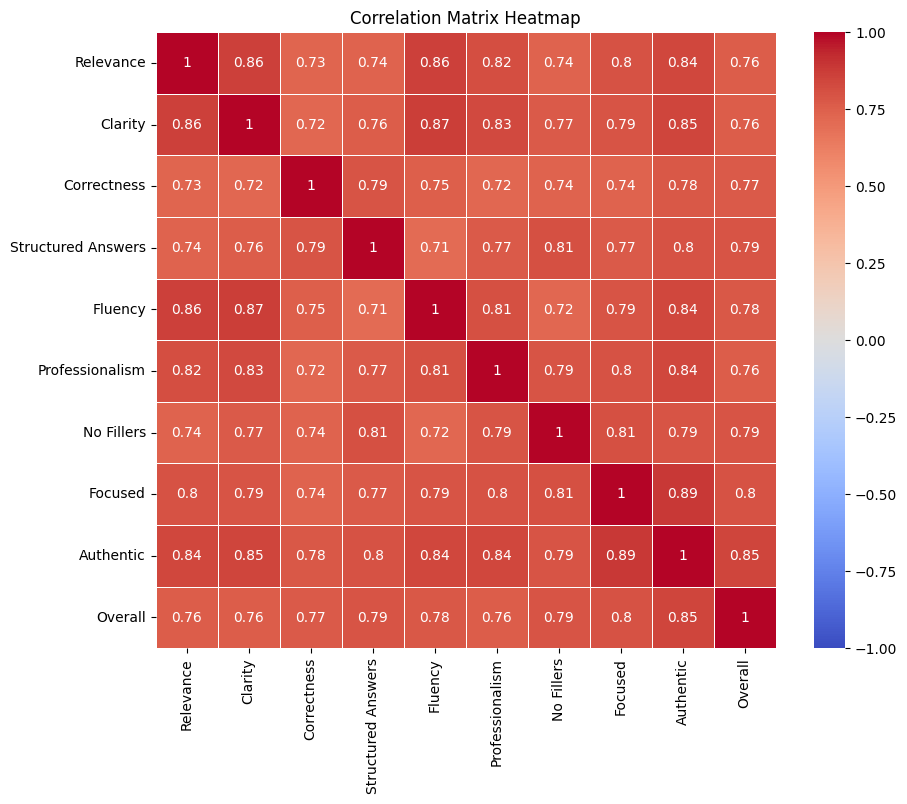

In [23]:
# plot the heatmap for the first dataset
plt.figure(figsize=(10, 8))
plot =sns.heatmap(corr1, cmap="coolwarm", annot=True, vmin = -1, vmax = 1, linewidth = 0.5)
plot.set_title('Correlation Matrix Heatmap')


In [24]:
corr2

,Relevance,Clarity,Correctness,Structured Answers,Fluency,Professionalism,No Fillers,Focused,Authentic,Overall
Relevance,1.00,0.92,0.83,0.82,0.93,0.93,0.87,0.88,0.92,0.77
Clarity,0.92,1.00,0.80,0.82,0.90,0.92,0.86,0.85,0.88,0.79
Correctness,0.83,0.80,1.00,0.85,0.77,0.82,0.82,0.86,0.85,0.76
Structured Answers,0.82,0.82,0.85,1.00,0.78,0.83,0.87,0.88,0.84,0.75
Fluency,0.93,0.90,0.77,0.78,1.00,0.90,0.83,0.86,0.88,0.78
Professionalism,0.93,0.92,0.82,0.83,0.90,1.00,0.89,0.89,0.93,0.78
No Fillers,0.87,0.86,0.82,0.87,0.83,0.89,1.00,0.87,0.90,0.78
Focused,0.88,0.85,0.86,0.88,0.86,0.89,0.87,1.00,0.90,0.78
Authentic,0.92,0.88,0.85,0.84,0.88,0.93,0.90,0.90,1.00,0.81
Overall,0.77,0.79,0.76,0.75,0.78,0.78,0.78,0.78,0.81,1.00


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

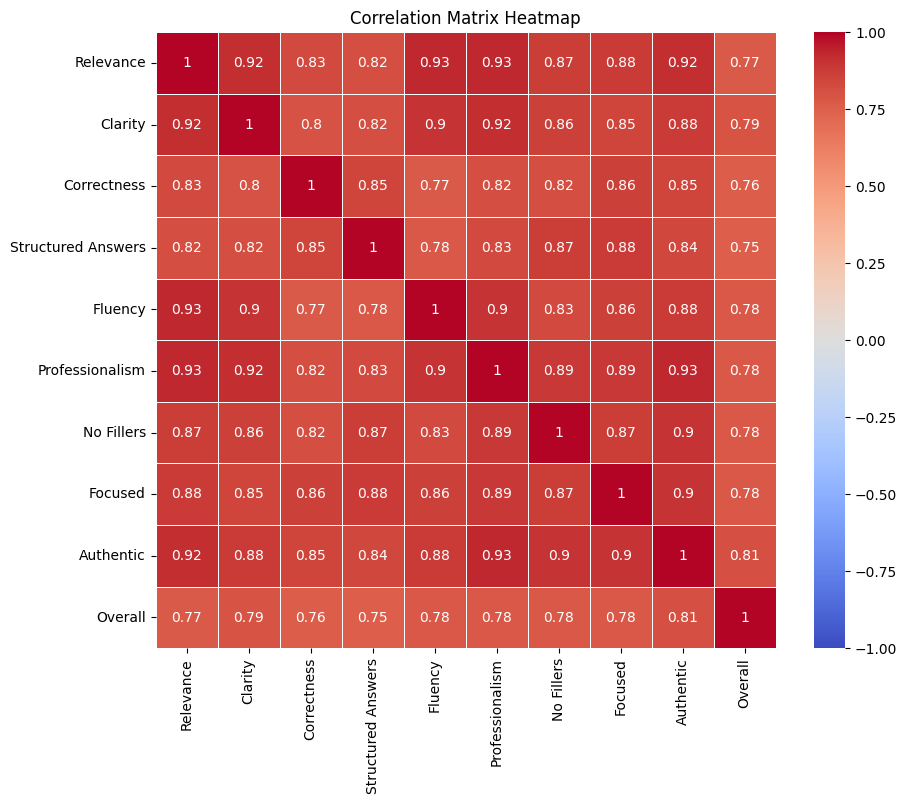

In [25]:
# plot the heatmap for the second dataset
plt.figure(figsize=(10, 8))
plot =sns.heatmap(corr2, cmap="coolwarm", annot=True, vmin = -1, vmax = 1, linewidth = 0.5)
plot.set_title('Correlation Matrix Heatmap')


In [26]:
#regression graph

In [27]:
matrix = np.triu(corr1)
matrix

array([[1.  , 0.86, 0.73, 0.74, 0.86, 0.82, 0.74, 0.8 , 0.84, 0.76],
       [0.  , 1.  , 0.72, 0.76, 0.87, 0.83, 0.77, 0.79, 0.85, 0.76],
       [0.  , 0.  , 1.  , 0.79, 0.75, 0.72, 0.74, 0.74, 0.78, 0.77],
       [0.  , 0.  , 0.  , 1.  , 0.71, 0.77, 0.81, 0.77, 0.8 , 0.79],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.81, 0.72, 0.79, 0.84, 0.78],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.79, 0.8 , 0.84, 0.76],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.81, 0.79, 0.79],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.89, 0.8 ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.85],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

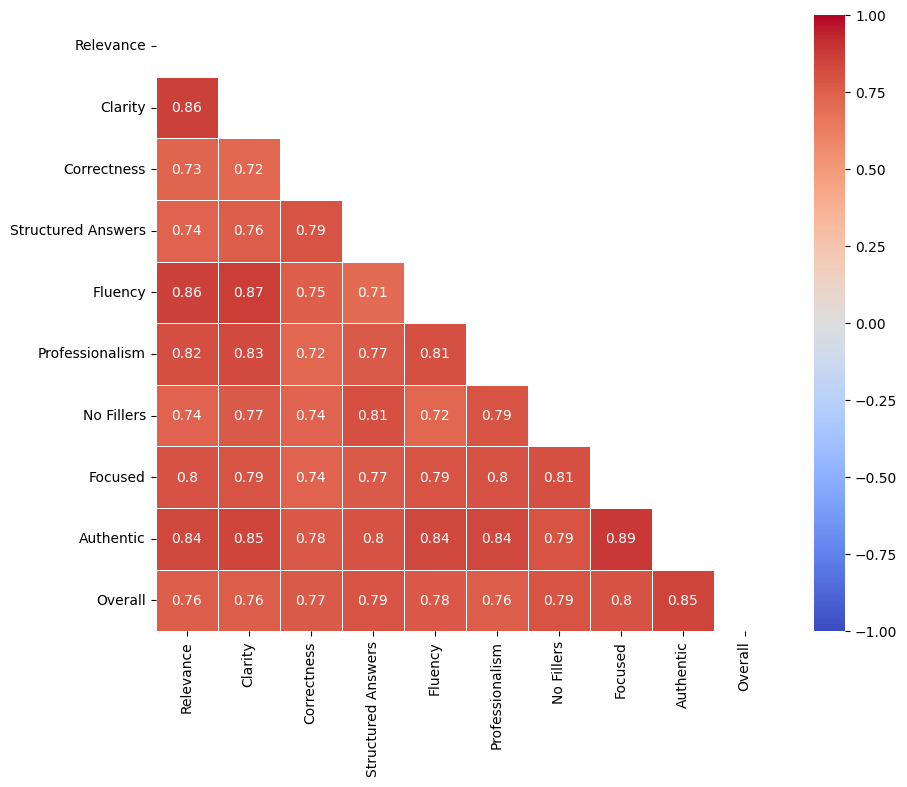

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(corr1, mask = matrix, annot=True, cmap='coolwarm', vmin = -1, vmax = 1, linewidth = 0.5 )
plt.show()

In [29]:
matrix = np.triu(corr2)
matrix

array([[1.  , 0.92, 0.83, 0.82, 0.93, 0.93, 0.87, 0.88, 0.92, 0.77],
       [0.  , 1.  , 0.8 , 0.82, 0.9 , 0.92, 0.86, 0.85, 0.88, 0.79],
       [0.  , 0.  , 1.  , 0.85, 0.77, 0.82, 0.82, 0.86, 0.85, 0.76],
       [0.  , 0.  , 0.  , 1.  , 0.78, 0.83, 0.87, 0.88, 0.84, 0.75],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.9 , 0.83, 0.86, 0.88, 0.78],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.89, 0.89, 0.93, 0.78],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.87, 0.9 , 0.78],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.9 , 0.78],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.81],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

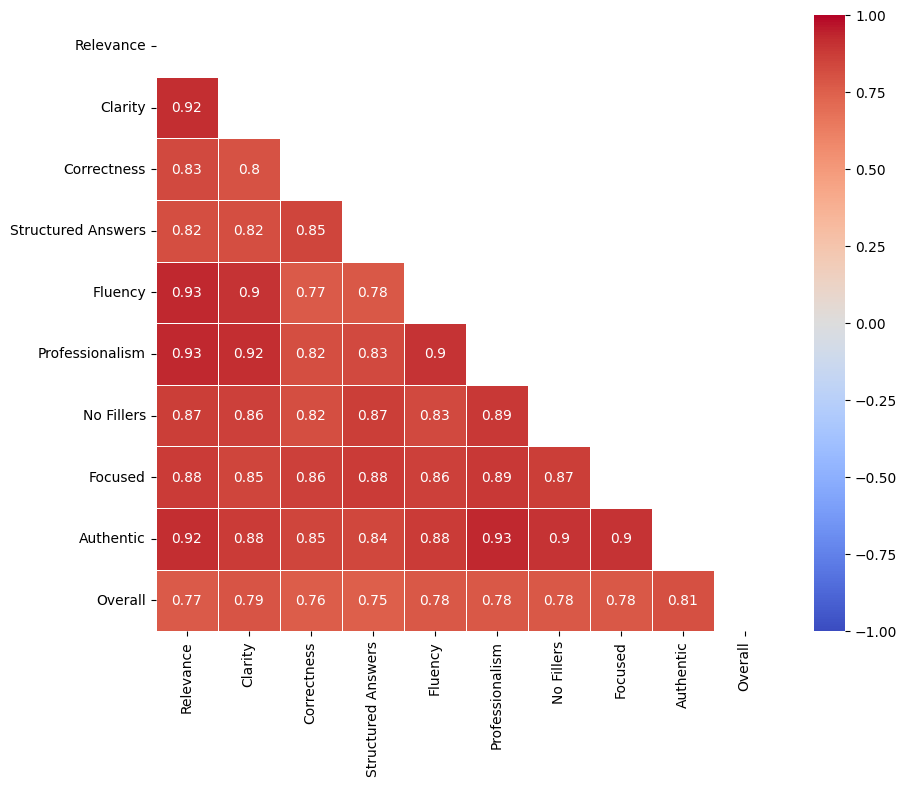

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(corr2, mask = matrix, annot=True, cmap='coolwarm', vmin = -1, vmax = 1, linewidth = 0.5 )
plt.show()